In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import ode
import numpy as np

In [2]:
# Vector field function
# The differential equation is x' = f(t,x)
def f(t,x):
  return t/np.sqrt(t**2+x**2)

# Range over which to plot slope field
trange = [-5, 5]
xrange = [-5, 5]

In [3]:
# Vector field allocation
T,X = np.meshgrid( np.linspace(trange[0],trange[1],20),np.linspace(xrange[0],xrange[1],20) )
U = np.ones(T.shape)
V = f(T,X)

In [4]:
# Normalize slopes
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N

In [5]:
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]=f(t,x[1])
  return dx

In [6]:
# Compute solution curve
t0=-3; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic = [-3,2]
Y=[];S=[];
r.set_initial_value(ic, t0).set_f_params()
while r.successful() and r.t +dt < tEnd:
    r.integrate(r.t+dt)
    Y.append(r.y)

S=np.array(np.real(Y))

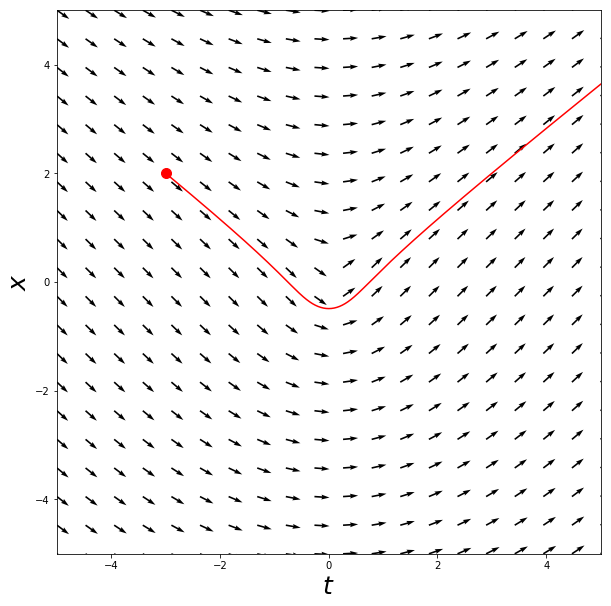

In [15]:
# Plot
fig, ax=plt.subplots(1, 1, figsize=(10,10))
ax.quiver( T,X,U2, V2)

plt.plot(S[:,0], S[:,1], 'r')
plt.plot(ic[0], ic[1], 'ro', markersize=10)

plt.axis('equal')
plt.axis('square')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
ax.xaxis.label.set_fontsize(25)
ax.yaxis.label.set_fontsize(25)